In [77]:
import tarfile
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the path to the tar.gz file and the extraction directory
tar_path = r"C:\Users\chand\Downloads\food-101.tar.gz"
extract_dir = r"C:\Users\chand\Downloads\food-101"

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Open and extract the tar.gz file with a filter that leaves each member unchanged
with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(path=extract_dir, filter=lambda tarinfo, targetpath: tarinfo)
    print(f"Extracted tar file to: {extract_dir}")



Extracted tar file to: C:\Users\chand\Downloads\food-101


In [99]:
import os

# Path to the extracted dataset
dataset_path = "food-101/images"  # Ensure this path matches where your images are stored

# Check if the directory exists
if os.path.exists(dataset_path):
    print(f"Dataset directory found: {dataset_path}")
else:
    print("Error: Dataset directory not found! Check your extraction path.")

Dataset directory found: food-101/images


In [101]:
#if os.path.exists(dataset_dir):
    #classes = sorted([d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))])
    #print("Found classes:")
    #for c in classes[:10]: 
        #print(c)
#else:
    #print(f"Directory not found: {dataset_dir}")

In [103]:
# Get class names (folder names)
class_names = sorted(os.listdir(dataset_path))  # Sorting ensures consistent order
print(f"Total {len(class_names)} classes found:")
print(class_names[:101])  

Total 101 classes found:
['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_chees

In [105]:
#image resizing 
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 123

In [113]:
dataset_dir = r"C:\Users\chand\Downloads\food-101"


In [115]:

# Creating training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)
# Creating validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 101000 files belonging to 1 classes.
Using 80800 files for training.
Found 101000 files belonging to 1 classes.
Using 20200 files for validation.


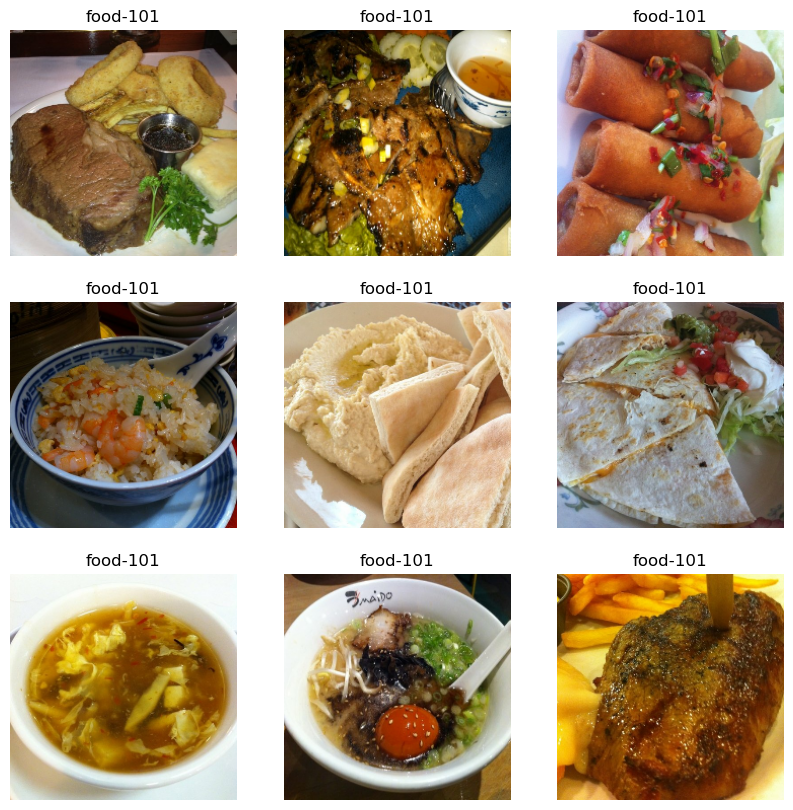

In [116]:
# Displaying some sample images from the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_dataset.class_names[labels[i]])
        plt.axis("off")
plt.show()

In [117]:

# Building CNN model

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    
    # Convolutional layer 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
     # Convolutional layer 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Flatten and Fully Connected Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    
    # Output Layer with 101 classes
    tf.keras.layers.Dense(101, activation='softmax')
])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 101)            │        25,957 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,271,525 (84.96 MB)

 Trainable params: 22,271,077 (84.96 MB)

 Non-trainable params: 448 (1.75 KB)

In [118]:
#Compiling the model with Adam Optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [32]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5,batch_size=32
)

Epoch 1/5
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1994s 788ms/step - accuracy: 0.9990 - loss: 0.0390 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 2033s 805ms/step - accuracy: 0.9999 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1880s 744ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1865s 739ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 2070s 820ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [34]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=8,batch_size=32,initial_epoch = 5
)

Epoch 6/8
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 2432s 963ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/8
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1879s 744ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/8
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1931s 765ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [123]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=9,batch_size=128,initial_epoch = 8
)

Epoch 9/9
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 2033s 804ms/step - accuracy: 0.9954 - loss: 0.1225 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [127]:
# Extracting the training accuracy from the last epoch
train_accuracy_last = history.history['accuracy'][-1]
print(f"Training Accuracy (last epoch): {train_accuracy_last:.4f}")


Training Accuracy (last epoch): 0.9992


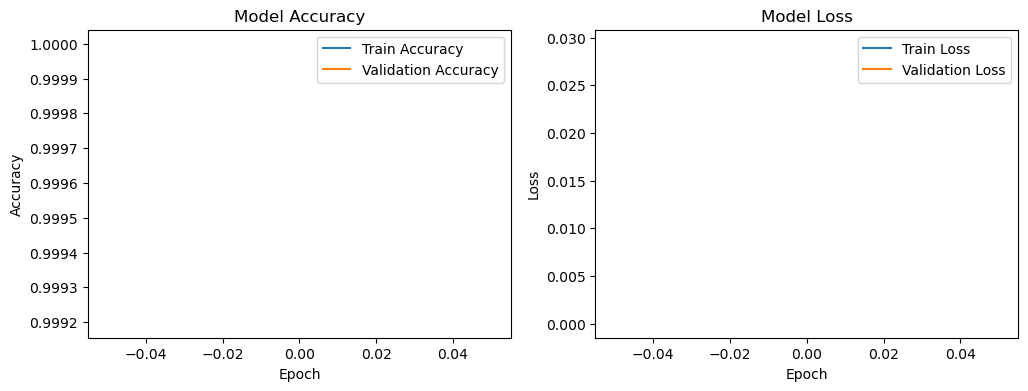

In [131]:
plt.figure(figsize=(12, 4))

# Ploting the Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Ploting the loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [133]:
# Evaluate the model using the validation dataset as a substitute for a test set.
test_loss, test_accuracy = model.evaluate(validation_dataset, verbose=1)
print(f"\nTest Loss (using validation data): {test_loss:.4f}")
print(f"Test Accuracy (using validation data): {test_accuracy:.4f}")


632/632 ━━━━━━━━━━━━━━━━━━━━ 82s 130ms/step - accuracy: 1.0000 - loss: 0.0000e+00

Test Loss (using validation data): 0.0000
Test Accuracy (using validation data): 1.0000


In [137]:
#taking images from the validation dataset
batch_images, batch_labels = next(iter(validation_dataset))
print("Validation dataset class names:", validation_dataset.class_names)

Validation dataset class names: ['food-101']


In [143]:
# Selecting a random index from the batch
import numpy as np
random_idx = np.random.randint(batch_images.shape[0])
test_image = batch_images[random_idx].numpy().astype("uint8")
test_label = int(batch_labels[random_idx].numpy())

In [159]:
# Retrieving the actual class name using the label index
if test_label < len(validation_dataset.class_names):
    actual_class_name = validation_dataset.class_names[test_label]
    actual_class_name = actual_class_name[random_idx]
else:
    actual_class_name = "Unknown"

print("Actual label index:", test_label)
print("Actual class name:", actual_class_name)


Actual label index: 0
Actual class name: 1


In [151]:
# Assume 'model' is your trained model and 'test_image' is preprocessed accordingly
prediction = model.predict(np.expand_dims(test_image, axis=0))
predicted_index = np.argmax(prediction, axis=1)[0]
predicted_class_name = class_names[predicted_index]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


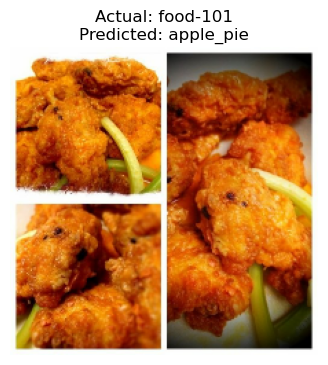

In [153]:
# Displaying the image with both actual and predicted class names 
plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.axis("off")
plt.title(f"Actual: {actual_class_name}\nPredicted: {predicted_class_name}")
plt.show()

Validation dataset class names: ['food-101']
Actual label index: 0
Actual class name: food-101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted label index: 0
Predicted class name: food-101


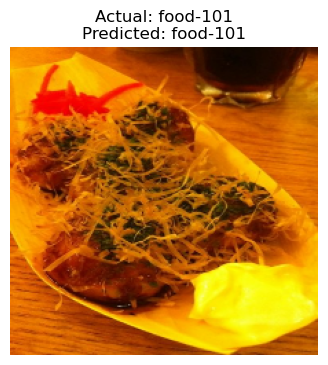

In [84]:
#taking images from the validation dataset
batch_images, batch_labels = next(iter(validation_dataset))

# Printing the dataset's class names for debugging
print("Validation dataset class names:", validation_dataset.class_names)

# Selecting a random index from the batch
random_idx = np.random.randint(batch_images.shape[0])
test_image = batch_images[random_idx].numpy().astype("uint8")

# Converting label to an integer 
test_label = int(batch_labels[random_idx].numpy())

# Retrieving the actual class name using the label index
if test_label < len(validation_dataset.class_names):
    actual_class_name = validation_dataset.class_names[test_label]
else:
    actual_class_name = "Unknown"
print("Actual label index:", test_label)
print("Actual class name:", actual_class_name)

# Preparing the image for prediction 
test_image_input = np.expand_dims(test_image, axis=0)

# Performing prediction 
predictions = model.predict(test_image_input)
predicted_idx = np.argmax(predictions)
if predicted_idx < len(validation_dataset.class_names):
    predicted_class_name = validation_dataset.class_names[predicted_idx]
else:
    predicted_class_name = "Unknown"
print("Predicted label index:", predicted_idx)
print("Predicted class name:", predicted_class_name)

# Displaying the image with both actual and predicted class names 
plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.axis("off")
plt.title(f"Actual: {actual_class_name}\nPredicted: {predicted_class_name}")
plt.show()
